<a href="https://colab.research.google.com/github/katetarasenko/Practical_7/blob/main/Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте CSV файл spark.read.csv()

ЗА ІНФОРМАЦІЄЮ НА KAGGLE ЦЕЙ ФАЙЛ НЕ МАЄ ПРОПУЩЕНИХ ДАНИХ В ЖОДНОМУ ІЗ РЯДКІВ,ДЛЯ ВИКОНАННЯ ЗАВДАНЬ З РОБОТОЮ З ПРОПУЩЕНИМИ ДАНИМИ Я ВІДРЕДАГУВАЛА ФАЙЛ. А САМЕ ВИДАЛИЛА ЗНАЧЕННЯ ПЕРШОЇ КОМІРКИ В СТОБЧИКУ 'User Rating'

In [ ]:
import os
import pandas as pd
import pyspark
from google.colab import files

uploaded = files.upload()

Saving bestsellers_with_categories1.csv to bestsellers_with_categories1.csv


In [ ]:

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

In [ ]:
dfpanda = pd.read_csv('bestsellers_with_categories1.csv')
dfpanda

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,NaN,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
missing_counts = dfpanda.isnull().sum()

# Display the counts
print(missing_counts)

Name           0
Author         0
User Rating    1
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [ ]:

df = spark.read.format("csv").load("bestsellers_with_categories1.csv", header = True)
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|       NULL|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

 Вивести схему даних за допомогою PrintSchema.

In [ ]:
df = spark.read.format("csv").load("bestsellers_with_categories1.csv", header = True)
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)



 Вивести назви стовпців і типи даних за допомогою dtypes


In [ ]:
column_types = df.dtypes


for column_name, data_type in column_types:
    print(f"{column_name}: {data_type}")

Name: string
Author: string
User Rating: string
Reviews: string
Price: string
Year: string
Genre: string


. Виведіть перші п'ять рядків (використовується метод head)


In [ ]:
df.show(5)
# the equivalent method to Pandas DataFrame's head() is show()

 Вивести перший рядок за допомогою first()

In [ ]:
df.first()

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating='4.7', Reviews='17350', Price='8', Year='2016', Genre='Non Fiction')

 Зробіть опис датасету за допомогою describe()


In [ ]:
df.describe()

summary,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550,550,550,550,550
mean,NULL,NULL,4.618363636363641,11953.281818181818,13.1,2014.0,NULL
stddev,NULL,NULL,0.22698036502519656,11731.132017431892,10.842261978422364,3.1651563841692782,NULL
min,"""The Plant Parado...",Abraham Verghese,3.3,10009,0,2009,Fiction
max,You Are a Badass:...,Zhi Gang Sha,4.9,9967,9,2019,Non Fiction


Виведіть список стовпців за допомогою columns()

In [ ]:
df.columns

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

 Виведіть загальну кількість рядків даних за допомогою count()


In [ ]:
df.count()

550

Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить
їх на NaN, потім тип даних на числовий.

In [ ]:
from pyspark.sql.functions import isnan, when, col

In [ ]:
df.show()

In [ ]:
# Define your replacement condition
def replace_condition(value):
    # Replace null values with your custom condition
    # Example: Replace null values with 0
    return value if value is not None else 0

# Iterate through each row and each column
for row in df.collect():
    for column_name in df.columns:
        # Get the current value in the row and column
        current_value = row[column_name]

        # Apply your custom replacement condition
        new_value = replace_condition(current_value)

        # Update the DataFrame with the new value
        your_data = df.withColumn(column_name,
                                         when(col(column_name) == current_value, new_value)
                                         .otherwise(col(column_name)))

# Show the updated DataFrame
your_data.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [ ]:
# Add a new column with the count of null values in each row
df_with_null_count = df.withColumn("null_count",
                                                 sum(when(col(c).isNull(), 1).otherwise(0) for c in df.columns))
# Filter rows where null values exist
your_data_with_null_count_filtered = df_with_null_count.filter(col("null_count") > 0)

# Show the filtered DataFrame
your_data_with_null_count_filtered.show()

+--------------------+--------+-----------+-------+-----+----+-----------+----------+
|                Name|  Author|User Rating|Reviews|Price|Year|      Genre|null_count|
+--------------------+--------+-----------+-------+-----+----+-----------+----------+
|10-Day Green Smoo...|JJ Smith|       NULL|  17350|    8|2016|Non Fiction|         1|
+--------------------+--------+-----------+-------+-----+----+-----------+----------+



.Замініть комірки з пропущеними значенями на середні за стовпцем. І
тип даних на float.

In [ ]:

for column_name in df.columns:
    average_value = df.agg({column_name: "avg"}).collect()[0][0]
    df = df.withColumn(column_name,
                                     when(col(column_name).isNull(), average_value)
                                     .otherwise(col(column_name)))

df.show()

+--------------------+--------------------+-----------------+-------+-----+----+-----------+
|                Name|              Author|      User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|4.618214936247727|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|              4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|              4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|              4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|              4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|              4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|              4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|              4.7|  19699| 

Про скільки книг зберігає дані датасет?

Це перевірка на наявність унікальних назв, Сам датасет має інформацію про 550 книг, при цій перевірці "серії" книг рахуються як одна книга

In [ ]:
column_name = "Name"

unique_values = df.select(column_name).distinct()

unique_values_count = df.groupBy(column_name).count()
total_unique_values = unique_values_count.count()
print(f"Total unique values in '{column_name}': {total_unique_values}")

unique_values.show()

Total unique values in 'Name': 351
+--------------------+
|                Name|
+--------------------+
|The Legend of Zel...|
|The Paris Wife: A...|
|The Wonderful Thi...|
|Eat This, Not Tha...|
|The Immortal Life...|
|George Washington...|
|Go the F**k to Sleep|
|Adult Coloring Bo...|
|Adult Coloring Bo...|
|Origin: A Novel (...|
|The Son of Neptun...|
| The Wright Brothers|
|     Decision Points|
|              Wonder|
|A Dance with Drag...|
|Divergent / Insur...|
|Dover Creative Ha...|
|Fantastic Beasts ...|
|Strange Planet (S...|
|The Lost Hero (He...|
+--------------------+
only showing top 20 rows



Змініть назви всіх колонок: назва з маленької букви, без пробілів через
підкреслення.


In [ ]:
column_name_mapping = {
    "Name": "name",
    "Author": "author",
    "User Rating": "user_rating",
    "Reviews": "reviews",
    "Price": "price",
    "Year": "year",
    "Genre": "genre",

}

for old_name, new_name in column_name_mapping.items():
    df = df.withColumnRenamed(old_name, new_name)


df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|       NULL|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [ ]:
from pyspark.sql.functions import max

Знайдіть автора з найвищим рейтингом.

In [ ]:

max_rating_row = df.agg(max("user_rating").alias("max_rating")).collect()[0]

max_rating = max_rating_row["max_rating"]

authors_with_max_rating = df.filter(col("user_rating") == max_rating).select("author", "user_rating")

if authors_with_max_rating.count() == 1:
    highest_author = authors_with_max_rating.collect()[0]
    print(f"The author with the highest rating is: {highest_author['author']} with a rating of {highest_author['user_rating']}")
else:
    print("Authors with the highest rating and their ratings:")
    authors_with_max_rating.show()

Authors with the highest rating and their ratings:
+--------------------+-----------+
|              author|user_rating|
+--------------------+-----------+
|     Bill Martin Jr.|        4.9|
|     Bill Martin Jr.|        4.9|
|          Dav Pilkey|        4.9|
|          Dav Pilkey|        4.9|
|          Dav Pilkey|        4.9|
|          Dav Pilkey|        4.9|
|          Dav Pilkey|        4.9|
|          Dav Pilkey|        4.9|
|          Dav Pilkey|        4.9|
|Sherri Duskey Rinker|        4.9|
|Sherri Duskey Rinker|        4.9|
|  Lin-Manuel Miranda|        4.9|
|        J.K. Rowling|        4.9|
|       J. K. Rowling|        4.9|
|        J.K. Rowling|        4.9|
|        J.K. Rowling|        4.9|
|     Brandon Stanton|        4.9|
|         Sarah Young|        4.9|
|         Sarah Young|        4.9|
|         Sarah Young|        4.9|
+--------------------+-----------+
only showing top 20 rows



In [ ]:

max_rating_row = df.agg(max("user_rating").alias("max_rating")).collect()[0]

max_rating = max_rating_row["max_rating"]

authors_with_max_rating = df.filter(col("user_rating") == max_rating).select("author").distinct()

if authors_with_max_rating.count() == 1:
    highest_author = authors_with_max_rating.collect()[0]
    print(f"The author with the highest rating is: {highest_author['author']} with a rating of {max_rating}")
else:
    print(f"Authors with the highest rating ({max_rating}):")
    authors_with_max_rating.show(truncate=False)

Authors with the highest rating (4.9):
+---------------------+
|author               |
+---------------------+
|Sarah Young          |
|Jill Twiss           |
|Rush Limbaugh        |
|Chip Gaines          |
|Mark R. Levin        |
|Jeff Kinney          |
|Nathan W. Pyle       |
|Lin-Manuel Miranda   |
|Dav Pilkey           |
|Dr. Seuss            |
|Alice Schertle       |
|Bill Martin Jr.      |
|Patrick Thorpe       |
|Emily Winfield Martin|
|Pete Souza           |
|Brandon Stanton      |
|J. K. Rowling        |
|Eric Carle           |
|Sherri Duskey Rinker |
|J.K. Rowling         |
+---------------------+



.Знайдіть автора з найнижчим рейтингом.

In [ ]:
from pyspark.sql.functions import min

In [ ]:

min_rating_row = df.agg(min("user_rating").alias("min_rating")).collect()[0]

min_rating = min_rating_row["min_rating"]

authors_with_min_rating = df.filter(col("user_rating") == min_rating).select("author").distinct()

if authors_with_min_rating.count() == 1:
    lowest_author = authors_with_min_rating.collect()[0]
    print(f"The author with the lowest rating is: {lowest_author['author']} with a rating of {min_rating}")
else:
    print(f"Authors with the lowest rating ({min_rating}):")
    authors_with_min_rating.show(truncate=False)

The author with the lowest rating is: J.K. Rowling with a rating of 3.3


In [ ]:
from pyspark.sql.functions import col, max, count

Знайдіть автора, що має найбільшу кількіть рецензій.


In [ ]:
df = spark.read.format("csv").load("bestsellers_with_categories1.csv", header = True)
df.show()
column_name = "Reviews"
df = df.withColumn(column_name, df[column_name].cast("int"))
print(df.dtypes)

your_max_value = df.agg({"Reviews": "max"}).collect()[0][0]
print(your_max_value)

max_value = df.agg(max(column_name).alias("max_value")).collect()[0]["max_value"]

print(f"The maximum value in column '{column_name}' is: {max_value}")

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|       NULL|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з
найбільшим рейтингом).

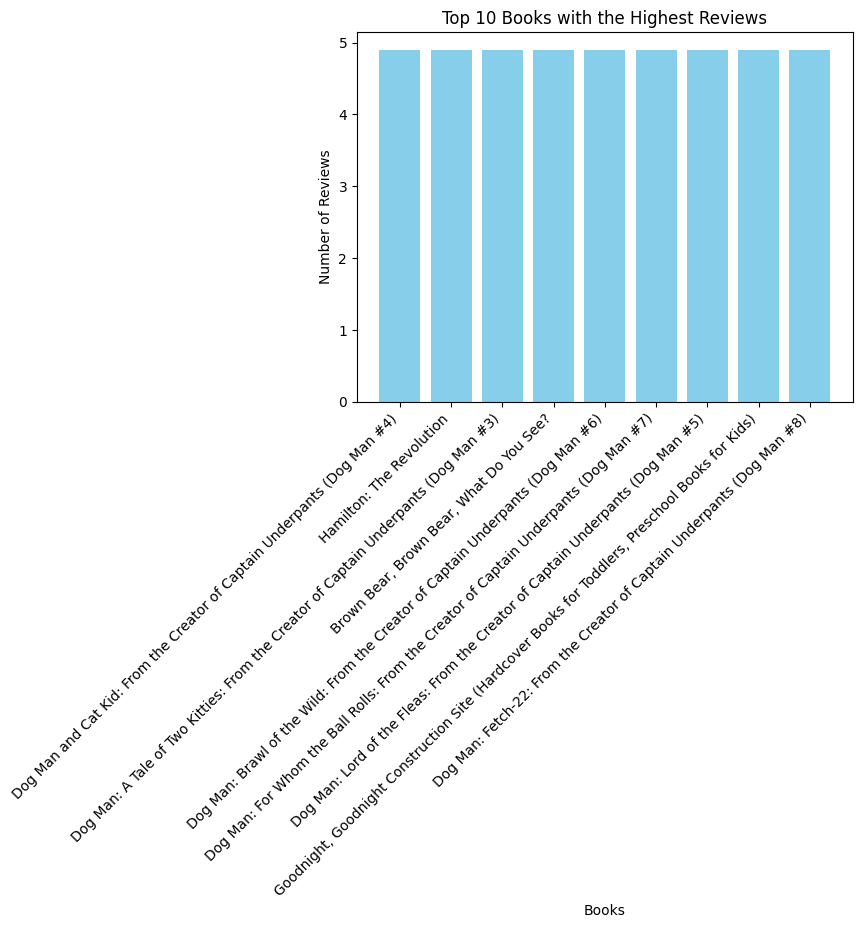

In [ ]:
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt
book_column = "name"
reviews_column = "user_rating"

top_10_books = df.select(book_column, reviews_column).orderBy(desc(reviews_column)).limit(10)

top_10_books_pd = top_10_books.toPandas()

bar_color = 'skyblue'

plt.bar(top_10_books_pd[book_column], top_10_books_pd[reviews_column], color=bar_color)
plt.xlabel('Books')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Books with the Highest Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from pyspark.sql.functions import corr

selected_columns = df.select('user_rating', 'reviews', 'price')

column_name = "price"
df = df.withColumn(column_name, df[column_name].cast("int"))
column_name = "user_rating"
df = df.withColumn(column_name, df[column_name].cast("float"))
column_name = "reviews"
df = df.withColumn(column_name, df[column_name].cast("int"))

df = df.withColumn(column_name, df[column_name].cast("float"))
correlation_matrix = selected_columns.stat.corr('user_rating', 'reviews'), selected_columns.stat.corr('user_rating', 'price'), selected_columns.stat.corr('reviews', 'price')


print("Correlation between 'user_rating' and 'reviews':", correlation_matrix[0])
print("Correlation between 'user_rating' and 'price':", correlation_matrix[1])
print("Correlation between 'reviews' and 'price':", correlation_matrix[2])

Correlation between 'user_rating' and 'reviews': -0.014413155081833023
Correlation between 'user_rating' and 'price': -0.0871318104550776
Correlation between 'reviews' and 'price': -0.10918188342780513
